### **Code** : **Variable Visualization(Boxplot)**
- Writer : Donghyeon Kim
- Date : 2022.08.27
- Variable : GHI, Temperature, Visibility
- Visualization Method : Boxplot by 1 year(2021.04 ~ 2022.03)

<hr>

### **0. Running the library and setting up the foundation**

In [1]:
# 1. 라이브러리 실행
from pathlib import Path
import os
import pandas as pd
import numpy as np 
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. 파일의 상위-상위 경로 설정
os_root = Path(os.path.join(os.getcwd(), '3. variable_visualization.ipynb'))
root = os_root.parent.parent

#### **User Data**

In [3]:
# 3. 사용자 데이터 호출
# Data 폴더
folder_root = os.path.join(root, 'data_merge_day_ghi')

# xlsx 파일 이름
xlsx_name = folder_root + '\\' + 'solar_use_day.xlsx'

# 데이터 호출
df_use = pd.read_excel(xlsx_name)

In [4]:
df_use.drop(['owner', 'id_hh', 'id_hs'], axis=1).head(10)

,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,place,kW_type,year,month,day,grid_kWh,export_kWh,yield_kWh,ym,status,visibility,idx
0,16.145759,1.704213,6.399946,1136.223042,1.286987,81.285597,0.010176,제주,3kW,2021,3,1,NaN,NaN,NaN,2021/3,rain,1664.500000,4
1,10.201415,-0.385694,-6.970232,3558.424858,0.000000,67.867242,0.004104,제주,3kW,2021,3,2,NaN,NaN,NaN,2021/3,no rain,2000.000000,4
2,13.162197,-5.255499,-2.133969,4420.213743,0.000000,55.097964,0.004375,제주,3kW,2021,3,3,NaN,NaN,NaN,2021/3,no rain,2000.000000,4
3,11.381629,-1.774555,-1.258689,619.253685,18.053650,86.822907,0.006781,제주,3kW,2021,3,4,NaN,NaN,NaN,2021/3,rain,1416.916667,4
4,13.332803,-0.669779,-3.370390,2795.556382,0.000000,88.024180,0.006976,제주,3kW,2021,3,5,0.010000,2.960000,10.690000,2021/3,no rain,1967.333333,4
5,14.038482,-5.416471,-3.302223,3966.088028,0.000000,77.616837,0.006587,제주,3kW,2021,3,6,0.230000,2.330000,7.930000,2021/3,no rain,1361.416667,4
6,12.188493,-6.894673,-3.639658,2768.404423,0.000000,71.012237,0.005506,제주,3kW,2021,3,7,5.520000,3.000000,7.070000,2021/3,no rain,1669.916667,4
7,13.803278,-2.267666,-3.534324,5139.888340,0.000000,71.470676,0.005447,제주,3kW,2021,3,8,10.000000,9.459999,14.810001,2021/3,no rain,888.416667,4
8,13.995266,-0.567859,-3.066563,4132.709616,0.000000,71.562719,0.005813,제주,3kW,2021,3,9,9.930000,6.290001,10.660000,2021/3,no rain,1990.666667,4
9,14.724379,-4.854604,-3.034851,5444.404632,0.000000,65.312751,0.005777,제주,3kW,2021,3,10,8.029999,12.820000,17.939999,2021/3,no rain,1062.083333,4


<hr>

### **1. Visualization**

#### 1) 일사량(GHI)

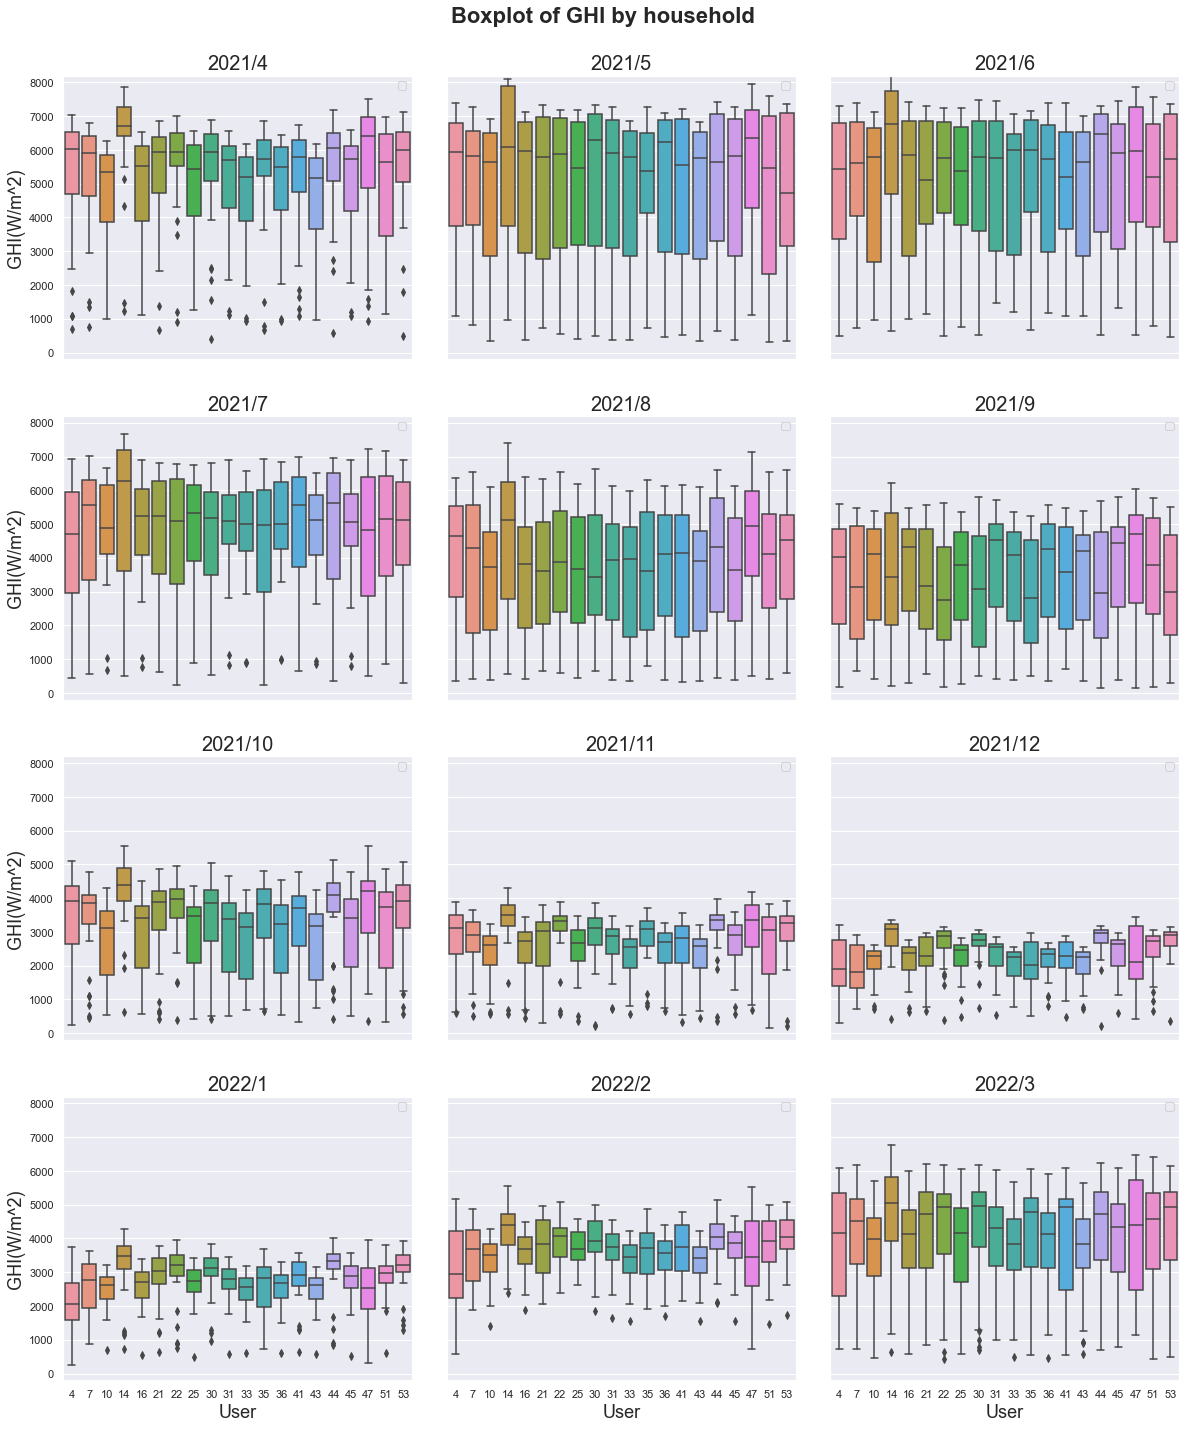

In [5]:
# Date List(2021/4 ~ 2022/3)
date_list = df_use.ym.unique().tolist() # 2021/3 ~ 2022/4
date_list = date_list[1:-1] # 2021/3, 2022/4 제외

sns.set(rc={'figure.figsize':(20, 24)})
plt.suptitle('Boxplot of GHI by household', y=0.92, fontsize=22, fontweight='bold')

for i in range(len(date_list)):
    # Year/Month Filtering
    df_use_filter = df_use[df_use.ym == date_list[i]]

    # Residuals Plot
    if i in [1, 2, 4, 5, 7, 8]:
        ax = plt.subplot(4, 3, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.ylim(-200.0, 8200.0)
        axp = sns.boxplot(y='ghi', x='idx', data=df_use_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        axp.set(ylabel=None)
        axp.axes.xaxis.set_ticklabels([])
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [0, 3, 6]: # x축 label만 제거
        ax = plt.subplot(4, 3, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.ylim(-200.0, 8200.0)
        axp = sns.boxplot(y='ghi', x='idx', data=df_use_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        plt.ylabel("GHI(W/m^2)", fontsize=18)
        axp.axes.xaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [10, 11]: # y축 label만 제거
        ax = plt.subplot(4, 3, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.ylim(-200.0, 8200.0)
        axp = sns.boxplot(y='ghi', x='idx', data=df_use_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel("User", fontsize=18)
        axp.set(ylabel=None)
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    else:
        ax = plt.subplot(4, 3, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.ylim(-200.0, 8200.0)
        axp = sns.boxplot(y='ghi', x='idx', data=df_use_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel("User", fontsize=18)
        plt.ylabel("GHI(W/m^2)", fontsize=18)
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
        
result_root = os.path.join(root, 'result_plot_use')
if not os.path.isdir(result_root):
    os.makedirs(result_root)

fig_name = result_root + '/' + 'boxplot_GHI.png'
plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)

#### 2) 기온(Temperature)

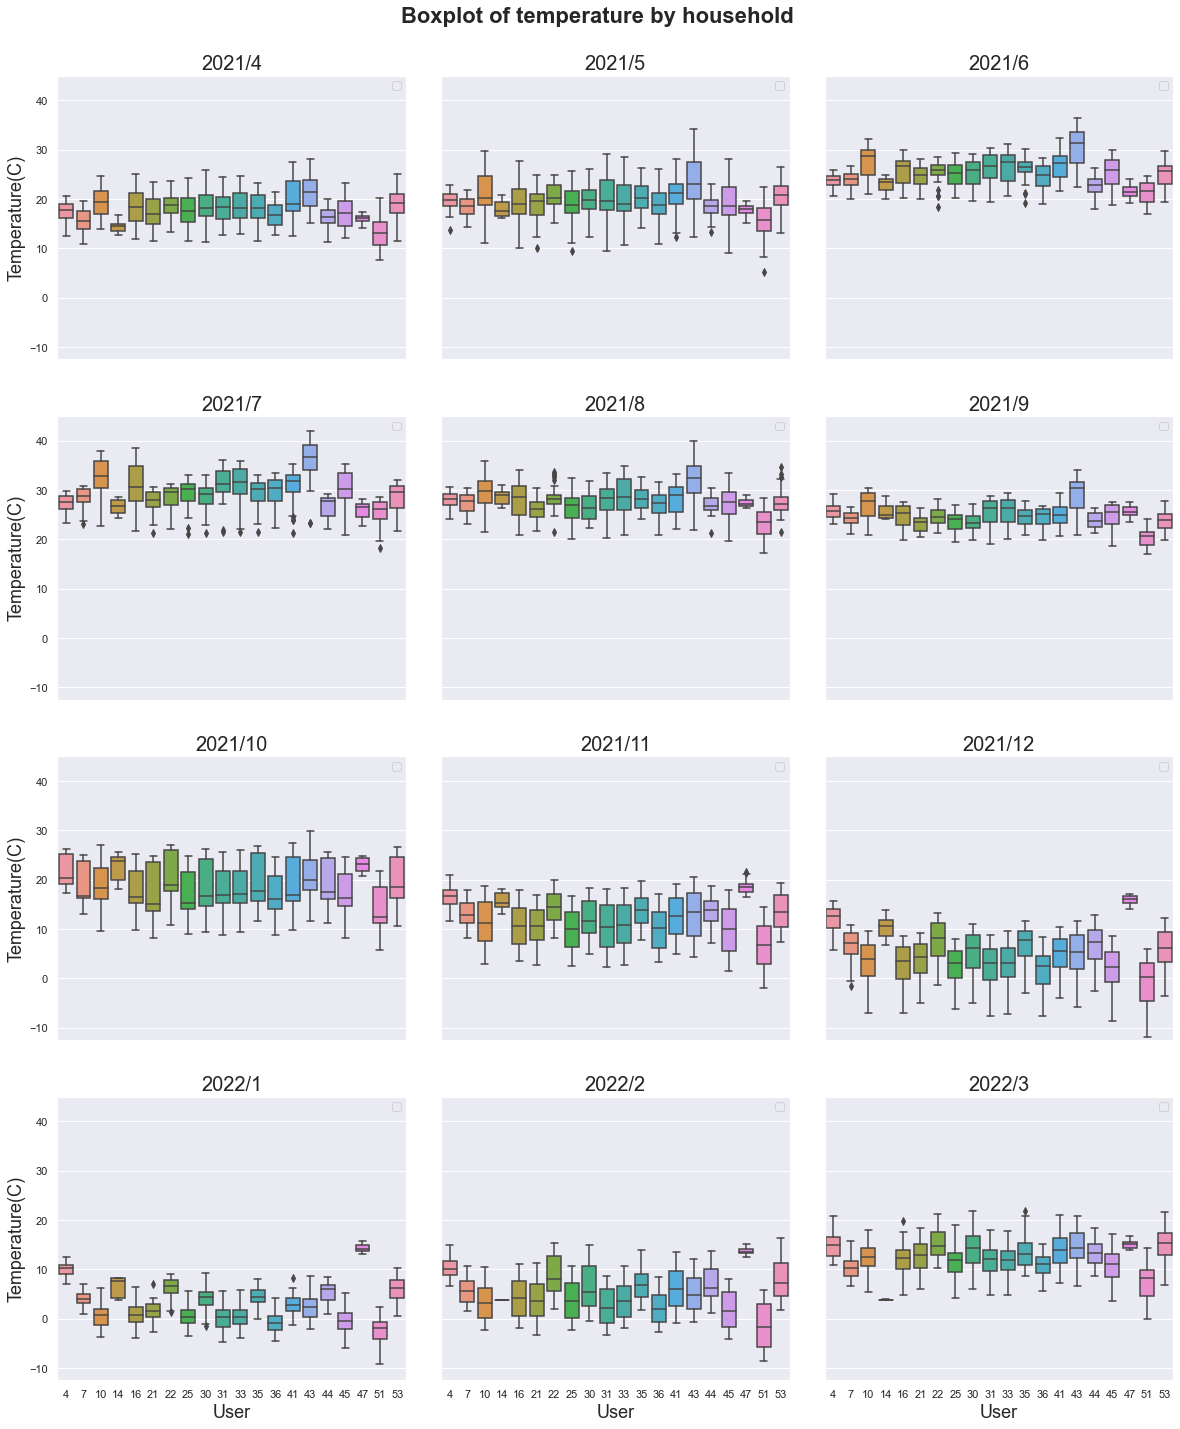

In [6]:
# Date List(2021/4 ~ 2022/3)
date_list = df_use.ym.unique().tolist() # 2021/3 ~ 2022/4
date_list = date_list[1:-1] # 2021/3, 2022/4 제외

sns.set(rc={'figure.figsize':(20, 24)})
plt.suptitle('Boxplot of temperature by household', y=0.92, fontsize=22, fontweight='bold')

for i in range(len(date_list)):
    # Year/Month Filtering
    df_use_filter = df_use[df_use.ym == date_list[i]]

    # Residuals Plot
    if i in [1, 2, 4, 5, 7, 8]:
        ax = plt.subplot(4, 3, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.ylim(-12.5, 45.0)
        axp = sns.boxplot(y='temperature', x='idx', data=df_use_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        axp.set(ylabel=None)
        axp.axes.xaxis.set_ticklabels([])
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [0, 3, 6]: # x축 label만 제거
        ax = plt.subplot(4, 3, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.ylim(-12.5, 45.0)
        axp = sns.boxplot(y='temperature', x='idx', data=df_use_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        plt.ylabel("Temperature(C)", fontsize=18)
        axp.axes.xaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [10, 11]: # y축 label만 제거
        ax = plt.subplot(4, 3, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.ylim(-12.5, 45.0)
        axp = sns.boxplot(y='temperature', x='idx', data=df_use_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel("User", fontsize=18)
        axp.set(ylabel=None)
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    else:
        ax = plt.subplot(4, 3, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.ylim(-12.5, 45.0)
        axp = sns.boxplot(y='temperature', x='idx', data=df_use_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel("User", fontsize=18)
        plt.ylabel("Temperature(C)", fontsize=18)
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
        
result_root = os.path.join(root, 'result_plot_use')
if not os.path.isdir(result_root):
    os.makedirs(result_root)

fig_name = result_root + '/' + 'boxplot_temperature.png'
plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)

#### 3) 시정(Visibility)

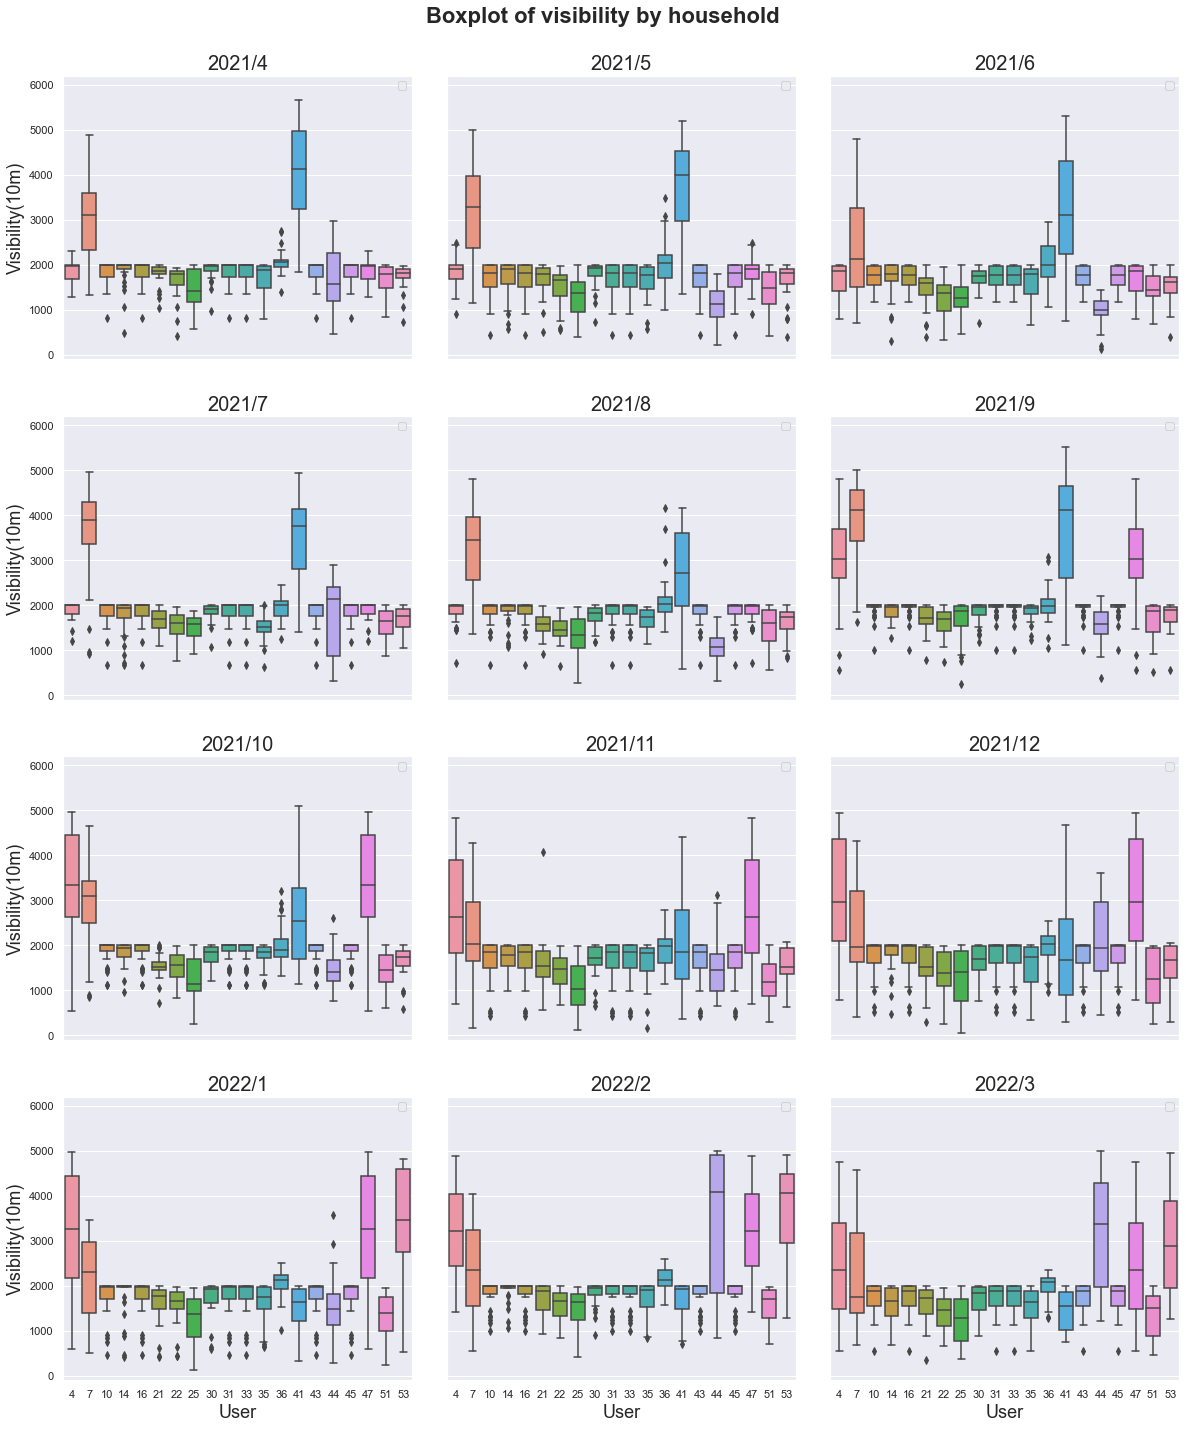

In [7]:
# Date List(2021/4 ~ 2022/3)
date_list = df_use.ym.unique().tolist() # 2021/3 ~ 2022/4
date_list = date_list[1:-1] # 2021/3, 2022/4 제외

sns.set(rc={'figure.figsize':(20, 24)})
plt.suptitle('Boxplot of visibility by household', y=0.92, fontsize=22, fontweight='bold')

for i in range(len(date_list)):
    # Year/Month Filtering
    df_use_filter = df_use[df_use.ym == date_list[i]]

    # Residuals Plot
    if i in [1, 2, 4, 5, 7, 8]:
        ax = plt.subplot(4, 3, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.ylim(-100.0, 6200.0)
        axp = sns.boxplot(y='visibility', x='idx', data=df_use_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        axp.set(ylabel=None)
        axp.axes.xaxis.set_ticklabels([])
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [0, 3, 6]: # x축 label만 제거
        ax = plt.subplot(4, 3, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.ylim(-100.0, 6200.0)
        axp = sns.boxplot(y='visibility', x='idx', data=df_use_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        axp.set(xlabel=None)
        plt.ylabel("Visibility(10m)", fontsize=18)
        axp.axes.xaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    elif i in [10, 11]: # y축 label만 제거
        ax = plt.subplot(4, 3, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.ylim(-100.0, 6200.0)
        axp = sns.boxplot(y='visibility', x='idx', data=df_use_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel("User", fontsize=18)
        axp.set(ylabel=None)
        axp.axes.yaxis.set_ticklabels([])
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)
    else:
        ax = plt.subplot(4, 3, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        plt.ylim(-100.0, 6200.0)
        axp = sns.boxplot(y='visibility', x='idx', data=df_use_filter)
        plt.title(f'{date_list[i]}', fontsize=20)
        plt.xlabel("User", fontsize=18)
        plt.ylabel("Visibility(10m)", fontsize=18)
        handles, labels = axp.get_legend_handles_labels()
        list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
        list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
        labels = [x[1] for x in list_labels_handles]
        handles = [x[0] for x in list_labels_handles]
        ax.legend(handles, labels)

result_root = os.path.join(root, 'result_plot_use')
if not os.path.isdir(result_root):
    os.makedirs(result_root)

fig_name = result_root + '/' + 'boxplot_visibility.png'
plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)